# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_80_run4/result-lstm-tcp80-hl2-seq4-do0.2-oov2500-part_8_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_8_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1
1,172.16.0.1-43392-192.168.10.50-80-tcp,0.574534,1,1,1,236080.122642,1,1,0
2,172.16.0.1-43460-192.168.10.50-80-tcp,0.542662,1,1,1,249688.204152,1,1,1
3,172.16.0.1-56434-192.168.10.50-80-tcp,0.508929,1,1,1,231350.478916,1,0,0
4,172.16.0.1-57406-192.168.10.50-80-tcp,0.592705,1,1,1,294445.489231,1,1,1


In [4]:
df_truth.head()

,ID,Label
0,172.16.0.1-41274-192.168.10.50-80-tcp,DoS Hulk
1,172.16.0.1-43392-192.168.10.50-80-tcp,DoS Hulk
2,172.16.0.1-43460-192.168.10.50-80-tcp,DoS Hulk
3,172.16.0.1-56434-192.168.10.50-80-tcp,DoS slowloris
4,172.16.0.1-57406-192.168.10.50-80-tcp,DoS Hulk


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        24031
0         1882
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        24031
0         1882
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           24013
0            1900
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0         DoS Hulk
1         DoS Hulk
2         DoS Hulk
3    DoS slowloris
4         DoS Hulk
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0            172.16.0.1-41274-192.168.10.50-80-tcp
1            172.16.0.1-43392-192.168.10.50-80-tcp
2            172.16.0.1-43460-192.168.10.50-80-tcp
3            172.16.0.1-56434-192.168.10.50-80-tcp
4            172.16.0.1-57406-192.168.10.50-80-tcp
                           ...                    
25908    192.168.10.15-51988-192.35.249.124-80-tcp
25909      192.168.10.17-39522-178.255.83.1-80-tcp
25910     192.168.10.25-59919-172.217.6.238-80-tcp
25911     192.168.10.12-35714-104.16.24.216-80-tcp
25912      192.168.10.12-42426-172.217.10.1-80-tcp
Name: id, Length: 25913, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0            172.16.0.1-41274-192.168.10.50-80-tcp
1            172.16.0.1-43392-192.168.10.50-80-tcp
2            172.16.0.1-43460-192.168.10.50-80-tcp
3            172.16.0.1-56434-192.168.10.50-80-tcp
4            172.16.0.1-57406-192.168.10.50-80-tcp
                           ...                    
25908    192.168.10.15-51988-192.35.249.124-80-tcp
25909      192.168.10.17-39522-178.255.83.1-80-tcp
25910     192.168.10.25-59919-172.217.6.238-80-tcp
25911     192.168.10.12-35714-104.16.24.216-80-tcp
25912      192.168.10.12-42426-172.217.10.1-80-tcp
Name: ID, Length: 25913, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
1,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
2,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
3,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
4,172.16.0.1-43392-192.168.10.50-80-tcp,0.574534,1,1,1,236080.122642,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
61316,172.16.0.1-41544-192.168.10.50-80-tcp,0.493377,1,1,1,188869.563758,0,0,0,1
61317,172.16.0.1-41544-192.168.10.50-80-tcp,0.493377,1,1,1,188869.563758,0,0,0,1
61318,172.16.0.1-41544-192.168.10.50-80-tcp,0.493377,1,1,1,188869.563758,0,0,0,1
61319,172.16.0.1-41544-192.168.10.50-80-tcp,0.493377,1,1,1,188869.563758,0,0,0,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
61321,192.168.10.16-52666-23.61.187.27-80-tcp,0.024390,0,0,0,2650.591599,0,0,0,0
61322,192.168.10.17-56329-23.50.75.27-80-tcp,0.030162,0,0,0,2758.021077,0,0,0,0
61323,192.168.10.5-50650-68.67.178.252-80-tcp,0.014644,0,0,0,26771.612081,0,0,0,0
61324,192.168.10.14-57029-37.157.2.42-80-tcp,0.045113,0,0,0,84160.784091,0,0,0,0
61325,192.168.10.19-48508-72.21.91.29-80-tcp,0.027650,0,0,0,6574.851163,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63970,192.168.10.15-51988-192.35.249.124-80-tcp,0.041193,0,0,0,113687.022515,0,0,0,0
63971,192.168.10.17-39522-178.255.83.1-80-tcp,0.032110,0,0,0,14714.527778,0,0,0,0
63972,192.168.10.25-59919-172.217.6.238-80-tcp,0.038666,0,0,0,49732.770301,0,0,0,0
63973,192.168.10.12-35714-104.16.24.216-80-tcp,0.054585,0,0,0,26010.704846,0,0,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
1,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
2,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
3,172.16.0.1-41274-192.168.10.50-80-tcp,0.554770,1,1,1,249874.265233,1,1,1,1
4,172.16.0.1-43392-192.168.10.50-80-tcp,0.574534,1,1,1,236080.122642,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
63970,192.168.10.15-51988-192.35.249.124-80-tcp,0.041193,0,0,0,113687.022515,0,0,0,0
63971,192.168.10.17-39522-178.255.83.1-80-tcp,0.032110,0,0,0,14714.527778,0,0,0,0
63972,192.168.10.25-59919-172.217.6.238-80-tcp,0.038666,0,0,0,49732.770301,0,0,0,0
63973,192.168.10.12-35714-104.16.24.216-80-tcp,0.054585,0,0,0,26010.704846,0,0,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        61321
0         2654
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
63970,0
63971,0
63972,0
63973,0


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.999820616102151
Recall-Binary-b_iqr: 0.9994129254252214
Recall-Binary-b_zscore: 0.9991356957649092
Recall-Floating-f_mean: 0.9088403646385415
Recall-Floating-f_iqr: 0.7046688736321978
Recall-Floating-f_zscore: 0.5253665139185597


### Confussion Matrix

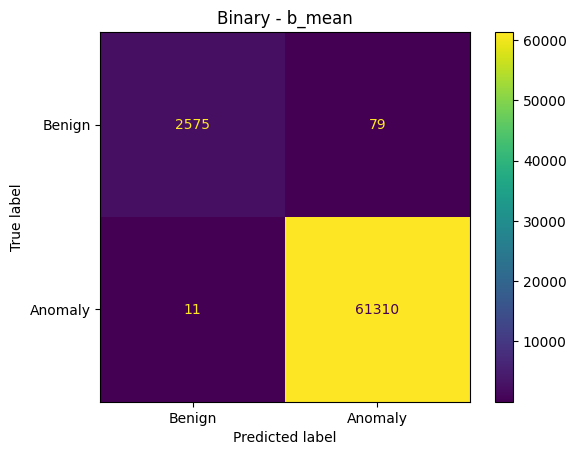

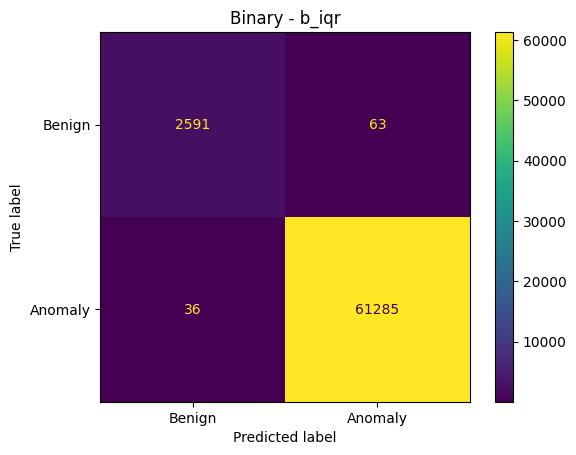

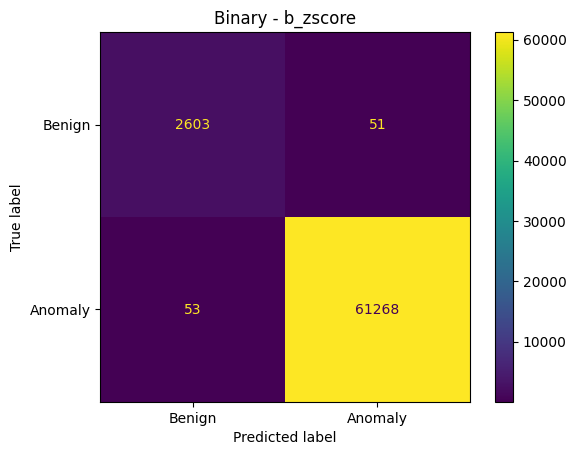

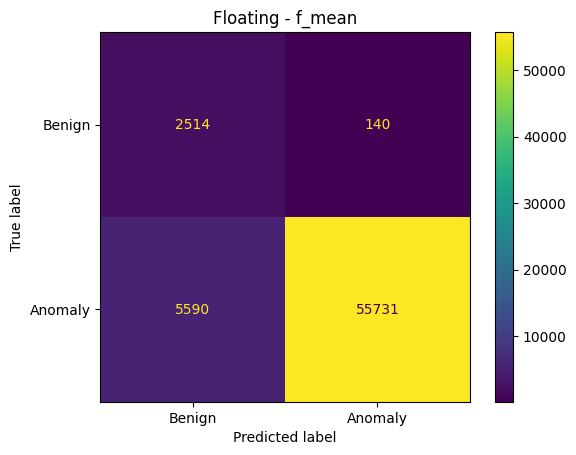

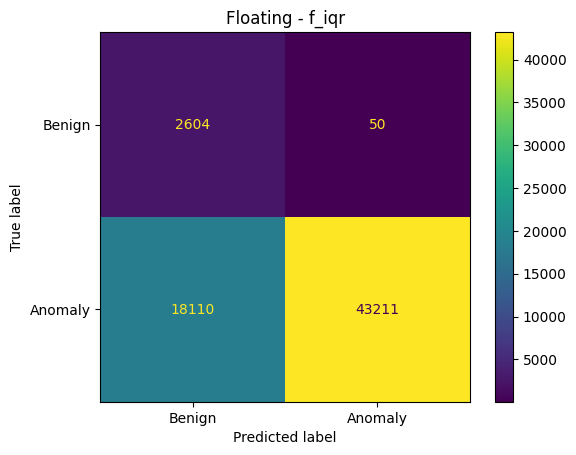

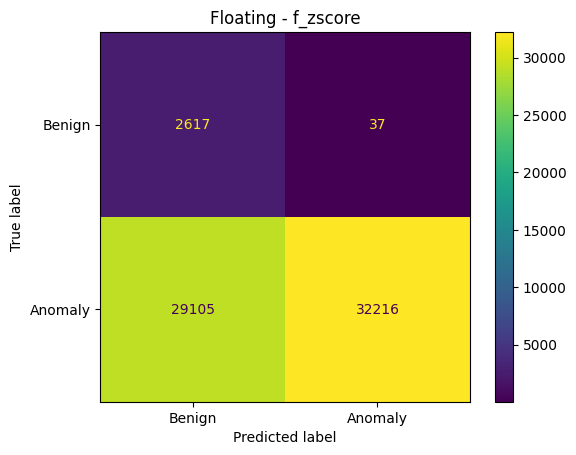

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9995989213266248
F2-Binary-b_iqr: 0.9993249236870255
F2-Binary-b_zscore: 0.9991422132203533
F2-Floating-f_mean: 0.9252876425760821
F2-Floating-f_iqr: 0.7487740213831465
F2-Floating-f_zscore: 0.5803910829907364


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.029766390354182368
FPR-Binary-b_iqr: 0.02373775433308214
FPR-Binary-b_zscore: 0.01921627731725697
FPR-Floating-f_mean: 0.05275056518462698
FPR-Floating-f_iqr: 0.018839487565938208
FPR-Floating-f_zscore: 0.013941220798794273


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9985932004689332
Accuracy-Binary-b_iqr: 0.9984525205158264
Accuracy-Binary-b_zscore: 0.9983743649863228
Accuracy-Floating-f_mean: 0.9104337631887456
Accuracy-Floating-f_iqr: 0.7161391168425166
Accuracy-Floating-f_zscore: 0.5444783118405627


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.999821,0.999599,0.029766,0.998593
b_iqr,0.999413,0.999325,0.023738,0.998453
b_zscore,0.999136,0.999142,0.019216,0.998374
f_mean,0.908840,0.925288,0.052751,0.910434
f_iqr,0.704669,0.748774,0.018839,0.716139
f_zscore,0.525367,0.580391,0.013941,0.544478


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl